In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

table = pd.read_csv("data\\clientes.csv")
display(table)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


In [3]:
# verificando se há valores nulos:

table.isnull().sum()

id_cliente                  0
mes                         0
idade                       0
profissao                   0
salario_anual               0
num_contas                  0
num_cartoes                 0
juros_emprestimo            0
num_emprestimos             0
dias_atraso                 0
num_pagamentos_atrasados    0
num_verificacoes_credito    0
mix_credito                 0
divida_total                0
taxa_uso_credito            0
idade_historico_credito     0
investimento_mensal         0
comportamento_pagamento     0
saldo_final_mes             0
score_credito               0
emprestimo_carro            0
emprestimo_casa             0
emprestimo_pessoal          0
emprestimo_credito          0
emprestimo_estudantil       0
dtype: int64

In [4]:
# verificar se temos valores vazios na tabela
print(table.info())
print(table.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

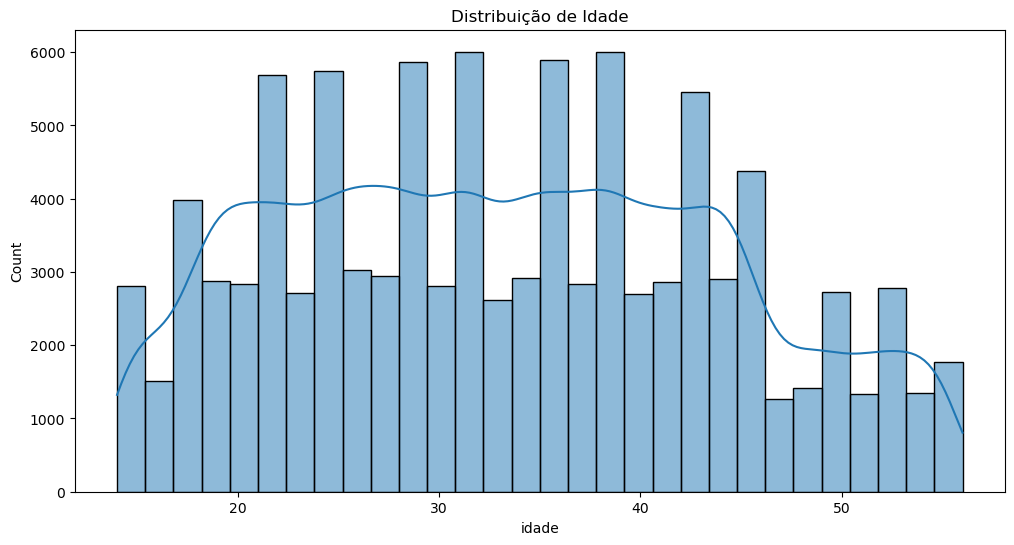

In [5]:
# Ve a distribuição de idade
plt.figure(figsize=(12, 6))
sns.histplot(table['idade'], bins = 30, kde=True)
plt.title('Distribuição de Idade')
plt.show()

In [7]:
table.describe()

,id_cliente,mes,idade,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,25982.666640,4.500000,33.316340,50505.123449,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,...,1426.220376,32.285173,221.220460,55.101315,392.697586,0.305600,0.511760,0.311040,0.31728,0.31040
std,14340.543051,2.291299,10.764812,38299.422093,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,...,1155.129026,5.116875,99.680716,39.006932,201.652719,0.460663,0.499864,0.462921,0.46542,0.46266
min,1006.000000,1.000000,14.000000,7005.930000,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,...,0.230000,20.000000,1.000000,0.000000,0.007760,0.000000,0.000000,0.000000,0.00000,0.00000
25%,13664.500000,2.750000,24.000000,19342.972500,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,...,566.072500,28.052567,144.000000,27.959111,267.615983,0.000000,0.000000,0.000000,0.00000,0.00000
50%,25777.000000,4.500000,33.000000,36999.705000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,...,1166.155000,32.305784,219.000000,45.156550,333.865366,0.000000,1.000000,0.000000,0.00000,0.00000
75%,38385.000000,6.250000,42.000000,71683.470000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,...,1945.962500,36.496663,302.000000,71.295797,463.215683,1.000000,1.000000,1.000000,1.00000,1.00000
max,50999.000000,8.000000,56.000000,179987.280000,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,...,4998.070000,50.000000,404.000000,434.191089,1183.930696,1.000000,1.000000,1.000000,1.00000,1.00000


In [8]:
"""
Idade média = 33.5
Idade mínima = 18
Idade máxima = 56
"""

'\nIdade média = 33.5\nIdade mínima = 18\nIdade máxima = 56\n'

In [9]:
from sklearn.preprocessing import  LabelEncoder
# Transformar variável categórica em numérica
codificator = LabelEncoder()

# Não aplicar na coluna score_credito
for coluna in table.columns:
    if table[coluna].dtype == "object" and coluna != "score_credito":
        table[coluna] = codificator.fit_transform(table[coluna])
                                                  
print(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int32  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int32  
 13  divida_total              100000 non-null  fl

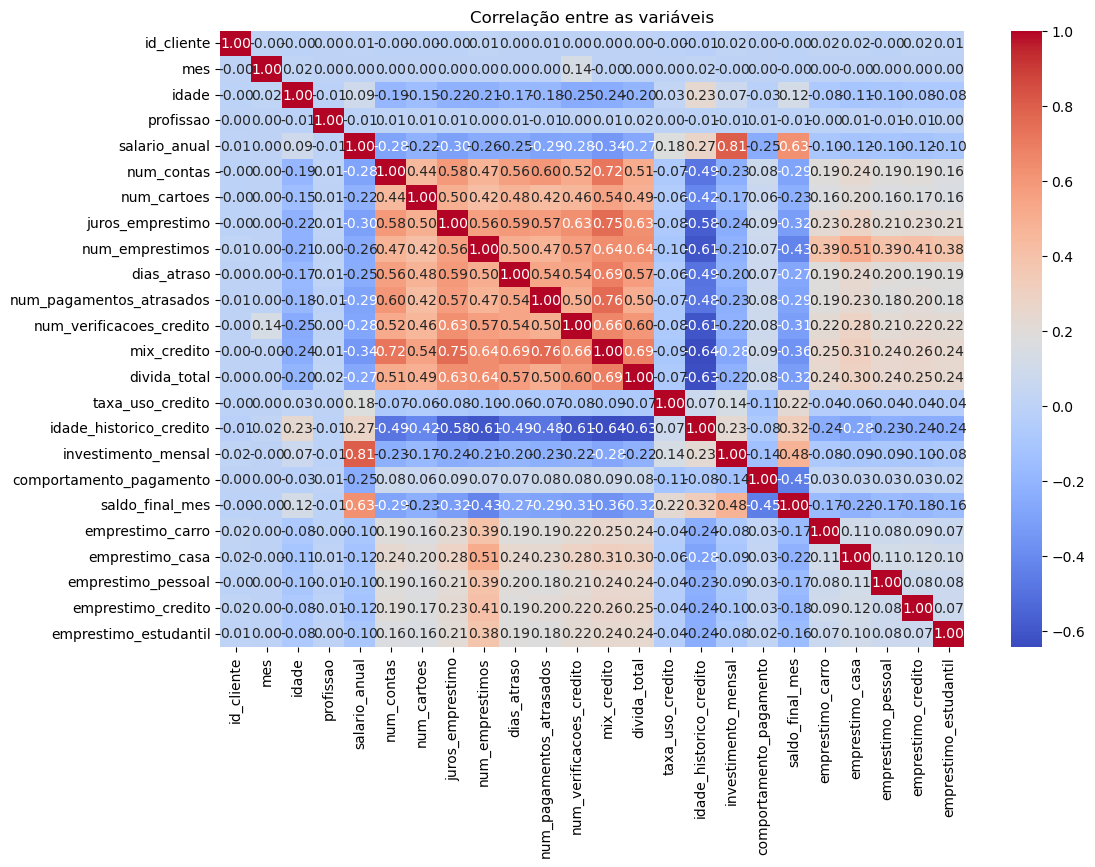

In [10]:
# Mapa de calor das correlações
numeric_cols = table.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre as variáveis')
plt.show()

In [11]:
display(table)
# Note que apenas a coluna score_credito não foi alterada, pois é a coluna que desejamos descobrir mais sobre


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,2,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,11,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,0,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,2,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,11,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,0,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,11,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,3,319.164979,Standard,1,0,0,0,1


In [12]:
# Definindo a variável dependente (y) e as variáveis independentes (x)
x = table.drop(columns=["score_credito", "id_cliente"], axis=1)  # Removendo as colunas indesejadas
y = table["score_credito"]  # Definindo a coluna a ser prevista

# Importando a função para dividir os dados
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

module_tree = RandomForestClassifier() # Importando o algoritmo arvore de decisão
module_knn = KNeighborsClassifier() #modelo do KNN (vizinhos mais próximos)

# training:

module_tree.fit(x_train, y_train)
module_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
# standard testing
counting_score = table["score_credito"].value_counts()
print(counting_score['Standard'] / sum(counting_score))

#53%

0.53174


In [15]:
from sklearn.metrics import accuracy_score

# calculando as previsoes

In [16]:
prevision_tree = module_tree.predict(x_test)
prevision_knn = module_knn.predict(x_test.to_numpy())

# comparando com o y_test
print(accuracy_score(y_test, prevision_tree))
print(accuracy_score(y_test, prevision_knn))

# 83%
# 73%

d:\Profissional\AnacondaPy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8253666666666667
0.7324


In [17]:
# quais as caracteristicas mais importantes para definir o score de credito??
columns = list(x_test.columns)
importance = pd.DataFrame(index=columns, data=module_tree.feature_importances_)
importance = importance * 100
display(importance)

,0
mes,3.994039
idade,4.241263
profissao,3.250358
salario_anual,5.109616
num_contas,3.358665
num_cartoes,4.584676
juros_emprestimo,7.216751
num_emprestimos,3.345014
dias_atraso,6.131720
num_pagamentos_atrasados,4.449962


In [18]:
"""
As Características Mais Importantes para determinar o score de crédito são:
   a) divida_total
   b) mix_credito (Object)
   c) juros_emprestimo
   d) idade_historico_credito
   e) dias_atraso
   e) saldo_final_mes
   f) salario_anual
   g) taxa_uso_credito
"""

'\nAs Características Mais Importantes para determinar o score de crédito são:\n   a) divida_total\n   b) mix_credito (Object)\n   c) juros_emprestimo\n   d) idade_historico_credito\n   e) dias_atraso\n   e) saldo_final_mes\n   f) salario_anual\n   g) taxa_uso_credito\n'

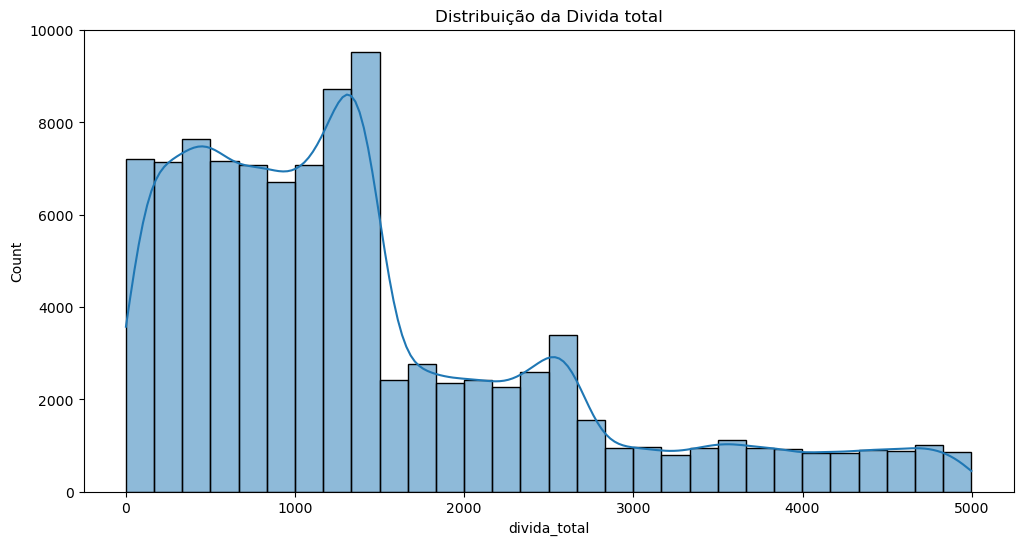

In [24]:
"""ADICIONAR MAIS VARIAVEIS PARA VISUALIZAR"""
plt.figure(figsize=(12, 6))
sns.histplot(table['divida_total'], bins = 30, kde=True)
plt.title('Distribuição da Divida total')
plt.show()

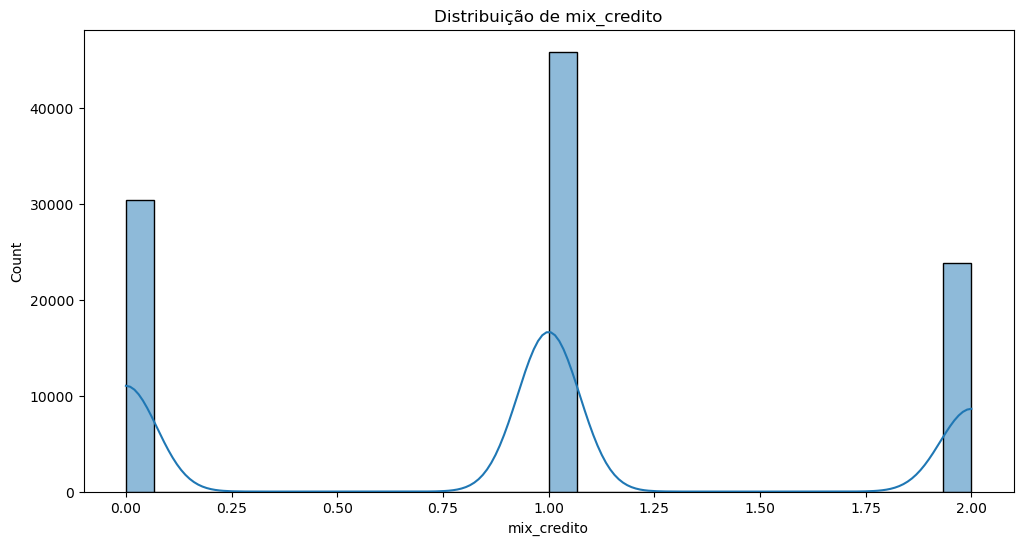

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(table['mix_credito'], bins = 30, kde=True)
plt.title('Distribuição de mix_credito')
plt.show()

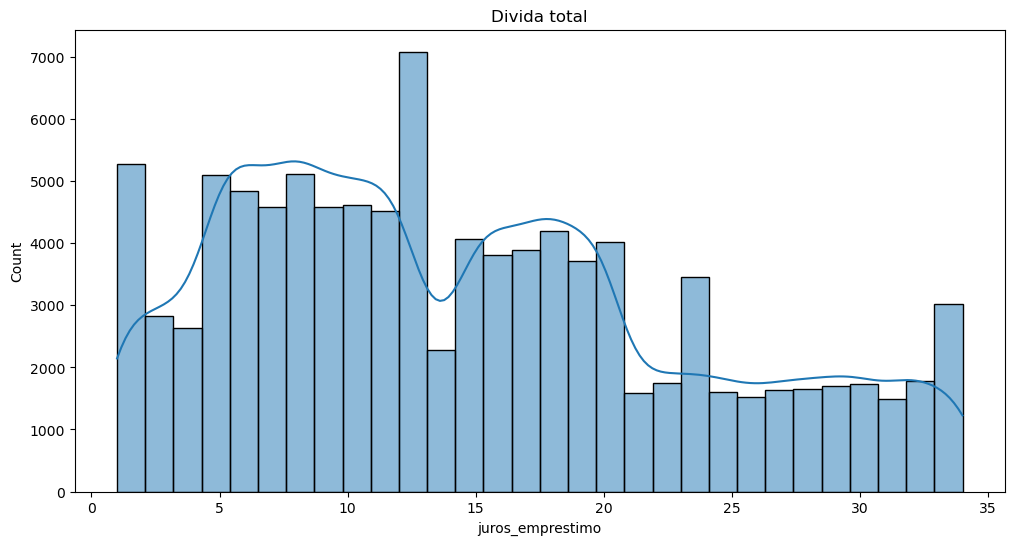

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(table['juros_emprestimo'], bins = 30, kde=True)
plt.title('Distribuição de juros_emprestimo')
plt.show()

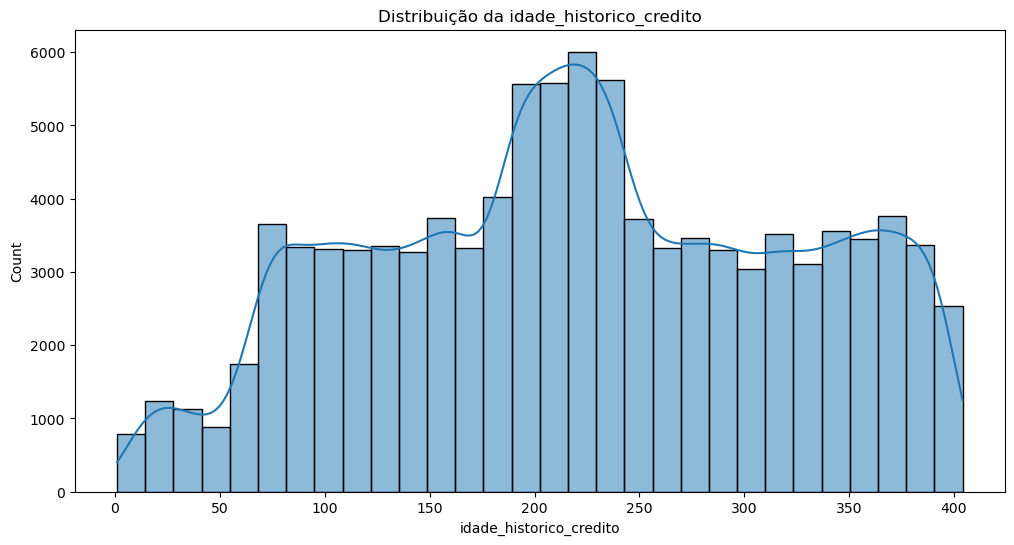

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(table['idade_historico_credito'], bins = 30, kde=True)
plt.title('Distribuição da idade_historico_credito')
plt.show()

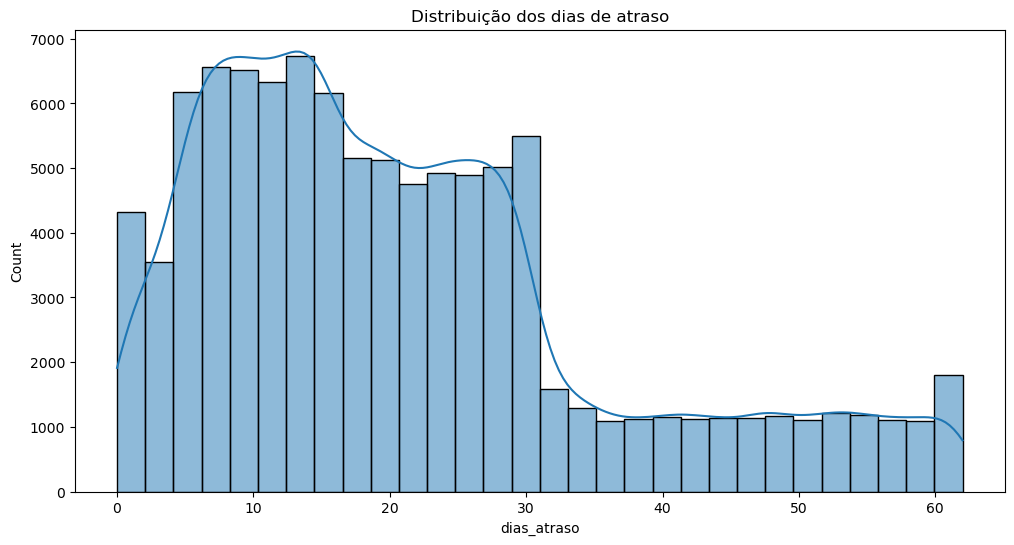

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(table['dias_atraso'], bins = 30, kde=True)
plt.title('Distribuição dos dias de atraso')
plt.show()


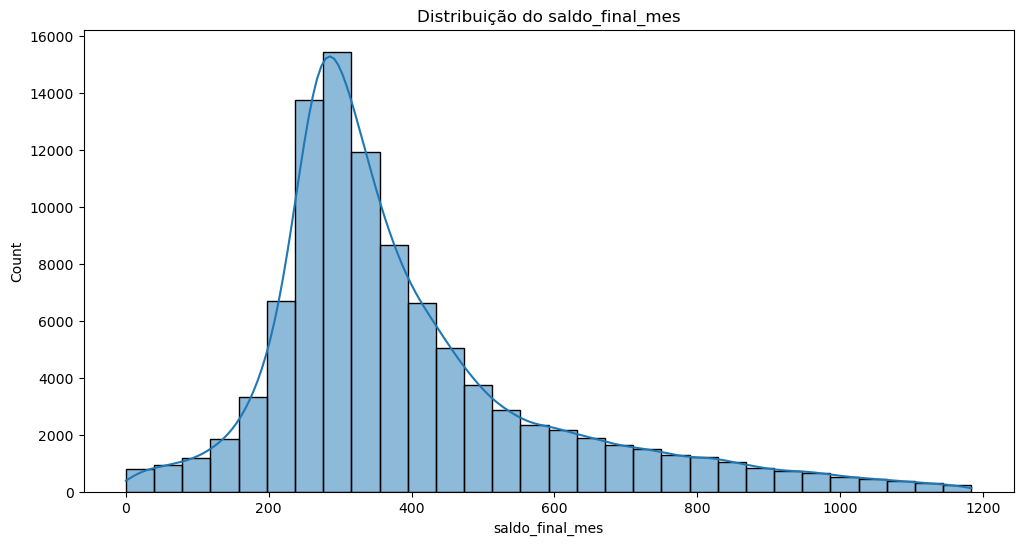

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(table['saldo_final_mes'], bins = 30, kde=True)
plt.title('Distribuição do saldo_final_mes')
plt.show()


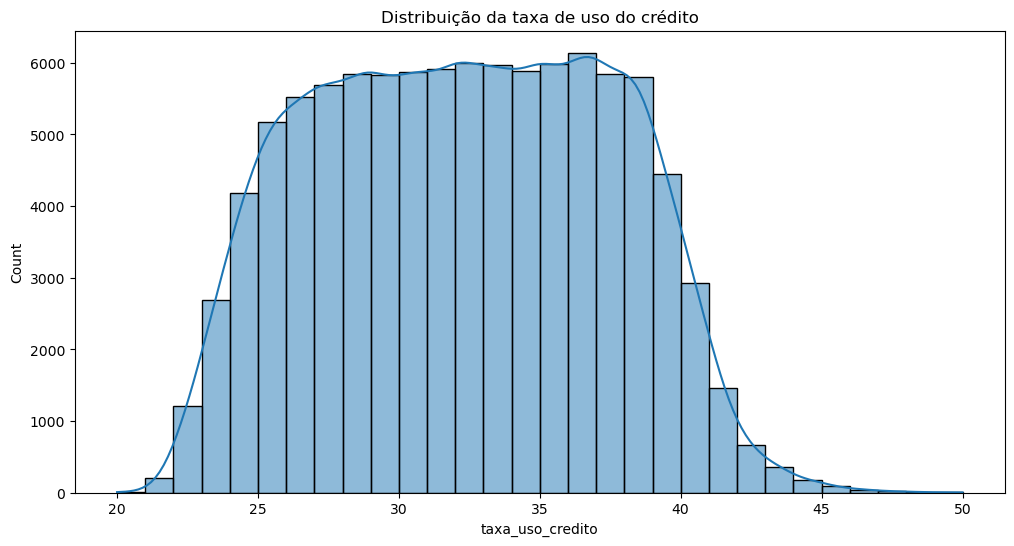

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(table['taxa_uso_credito'], bins = 30, kde=True)
plt.title('Distribuição da taxa de uso do crédito')
plt.show()


In [27]:
"""Explorando as 7 características mais importantes com describe()"""
table[['divida_total', 'juros_emprestimo', 'idade_historico_credito', 'dias_atraso', 'saldo_final_mes', 'salario_anual', 'taxa_uso_credito']].describe()

,divida_total,juros_emprestimo,idade_historico_credito,dias_atraso,saldo_final_mes,salario_anual,taxa_uso_credito
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,1426.220376,14.53208,221.220460,21.08141,392.697586,50505.123449,32.285173
std,1155.129026,8.74133,99.680716,14.80456,201.652719,38299.422093,5.116875
min,0.230000,1.00000,1.000000,0.00000,0.007760,7005.930000,20.000000
25%,566.072500,7.00000,144.000000,10.00000,267.615983,19342.972500,28.052567
50%,1166.155000,13.00000,219.000000,18.00000,333.865366,36999.705000,32.305784
75%,1945.962500,20.00000,302.000000,28.00000,463.215683,71683.470000,36.496663
max,4998.070000,34.00000,404.000000,62.00000,1183.930696,179987.280000,50.000000


In [28]:
table[['mix_credito']].describe()

,mix_credito
count,100000.000000
mean,0.933840
std,0.732904
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


### Exploração Inicial dos 8 Atributos Mais Importantes

**divida_total:** <br>
- média = 1426.22  
- max = 4998.07  
- min = 0.23  

**juros_emprestimo:** <br>
- média = 14.53  
- max = 34.00  
- min = 1.00  

**idade_historico_credito:** <br>
- média = 221.22  
- max = 404.00  
- min = 1.00  

**dias_atraso:** <br>
- média = 21.08  
- max = 62.00  
- min = 0.00  

**saldo_final_mes:** <br>
- média = 392.70  
- max = 1183.93  
- min = 0.01  

**salario_anual:** <br>
- média = 50505.12  
- max = 179987.28  
- min = 7005.93  

**taxa_uso_credito:** <br>
- média = 32.29  
- max = 50.00  
- min = 20.00  

**mix_credito:** <br>
- freq = 45848

In [ ]:
""" 
table = pd.read_csv("data\\clientes.csv")
from IPython.display import  display 
"""
# display(table)
table.tail(5)
table.head(5)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.46538,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.46538,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.46538,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.46538,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.46538,2,341.489231,Good,1,1,1,1,0


In [ ]:
"""
^^ Resultados da Análise:

1. Desempenho do Modelo:
   - Random Forest Classifier: 83% de precisão
   - K-Nearest Neighbors: 73% de precisão
   O modelo Random Forest supera o KNN e é escolhido para análise adicional.

2. Características Mais Importantes:
   As 5 características mais influentes para determinar o score de crédito são:
   a) divida_total
   b) mix_credito
   c) juros_emprestimo
   d) utilizacao_credito
   e) idade

3. Comparação com a Linha de Base:
   - A categoria de score de crédito 'Standard' representa 53% do conjunto de dados.
   - Nosso modelo Random Forest alcança 83% de precisão, superando significativamente a linha de base.

4. Impacto nos Negócios:
   Com este modelo de 83% de precisão, a empresa agora pode:
   - Avaliar melhor a capacidade de crédito dos clientes
   - Personalizar produtos financeiros de acordo com os perfis dos clientes
   - Implementar estratégias de gestão de risco mais eficazes
   - Potencialmente aumentar as taxas de aprovação para clientes com boa capacidade de crédito

5. Próximos Passos:
   - Considerar engenharia de características para melhorar o desempenho do modelo
   - Explorar outros algoritmos (por exemplo, Gradient Boosting, SVM)
   - Investigar os casos classificados incorretamente para entender as limitações do modelo
   - Desenvolver um sistema para monitoramento e atualização contínua do modelo

Esta análise fornece insights valiosos sobre os scores de crédito dos clientes, permitindo uma tomada de decisão mais informada em empréstimos e ofertas de produtos financeiros.
"""

"\n^^ Resultados da Análise:\n\n1. Desempenho do Modelo:\n   - Random Forest Classifier: 83% de precisão\n   - K-Nearest Neighbors: 73% de precisão\n   O modelo Random Forest supera o KNN e é escolhido para análise adicional.\n\n2. Características Mais Importantes:\n   As 5 características mais influentes para determinar o score de crédito são:\n   a) divida_total\n   b) mix_credito\n   c) juros_emprestimo\n   d) utilizacao_credito\n   e) idade\n\n3. Comparação com a Linha de Base:\n   - A categoria de score de crédito 'Standard' representa 53% do conjunto de dados.\n   - Nosso modelo Random Forest alcança 83% de precisão, superando significativamente a linha de base.\n\n4. Impacto nos Negócios:\n   Com este modelo de 83% de precisão, a empresa agora pode:\n   - Avaliar melhor a capacidade de crédito dos clientes\n   - Personalizar produtos financeiros de acordo com os perfis dos clientes\n   - Implementar estratégias de gestão de risco mais eficazes\n   - Potencialmente aumentar as ta